In [1]:
import SigVarGen as svr
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
domain = 'Cameras'
sig_len = 500

t = np.linspace(0, 1, sig_len)
n_sinusoids = random.randint(20, 50)

drop = False
color = 'White'

signal_range, interrupt_range = svr.generate_device_parameters(svr.EMBEDDED_DEVICE_RANGES, drop=drop, frequency_follows_amplitude=False, split_ratio=0.3)

amplitude_range = signal_range[domain]['amplitude']
frequency_range = signal_range[domain]['frequency']

amplitude_range_2 = interrupt_range[domain]['amplitude']
frequency_range_2 = interrupt_range[domain]['frequency']

max_mV = int(max(interrupt_range[domain]['amplitude']) * 50)
noise_data = svr.calculate_noise_power(10, max_mV, 10)
df_noise = pd.DataFrame(noise_data, columns=["σ (mV)", "σ (V)", "Noise_Power"])

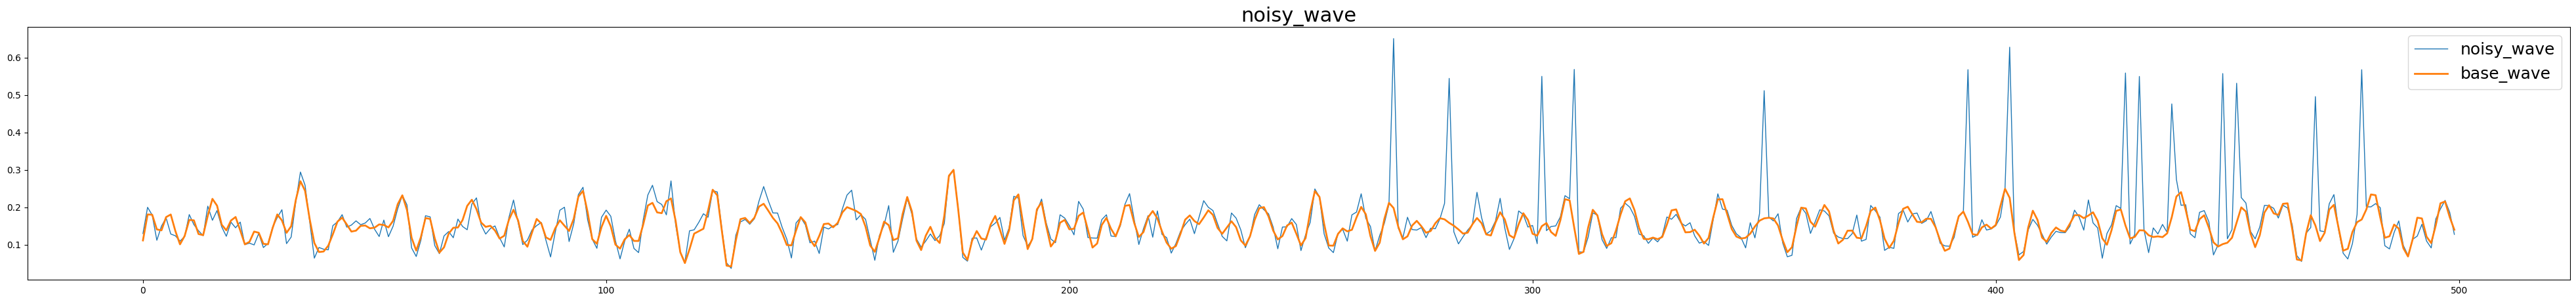

In [7]:
base_wave, _ = svr.generate_signal(t, n_sinusoids, amplitude_range, frequency_range)

inter_wave, _ = svr.generate_signal(t, n_sinusoids, (amplitude_range_2[0], amplitude_range_2[1]/2), frequency_range_2)

noise_power = random.choice(df_noise['Noise_Power'])
            

base_pattern = np.zeros(100)
base_pattern_2 = np.concatenate((np.zeros(100), np.array([1])), axis=0) 

variation_wave = svr.add_periodic_interrupts(base_wave.copy(), svr.EMBEDDED_DEVICE_RANGES[domain]['amplitude'], inter_wave, 250, 400, length=500, base_pattern=base_pattern, base_pattern_2=base_pattern_2, flip_probability=0, flip_probability_2=0.05)

noisy_wave = svr.add_colored_noise(variation_wave, noise_power, npw=[1,1], mf=[1,1], color=color)

plt.figure(figsize=(50, 5))
plt.plot(range(len(noisy_wave)), noisy_wave, label='noisy_wave', linewidth=1)
plt.plot(range(len(base_wave)), base_wave, label='base_wave', linewidth=2)
plt.title(f"noisy_wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()

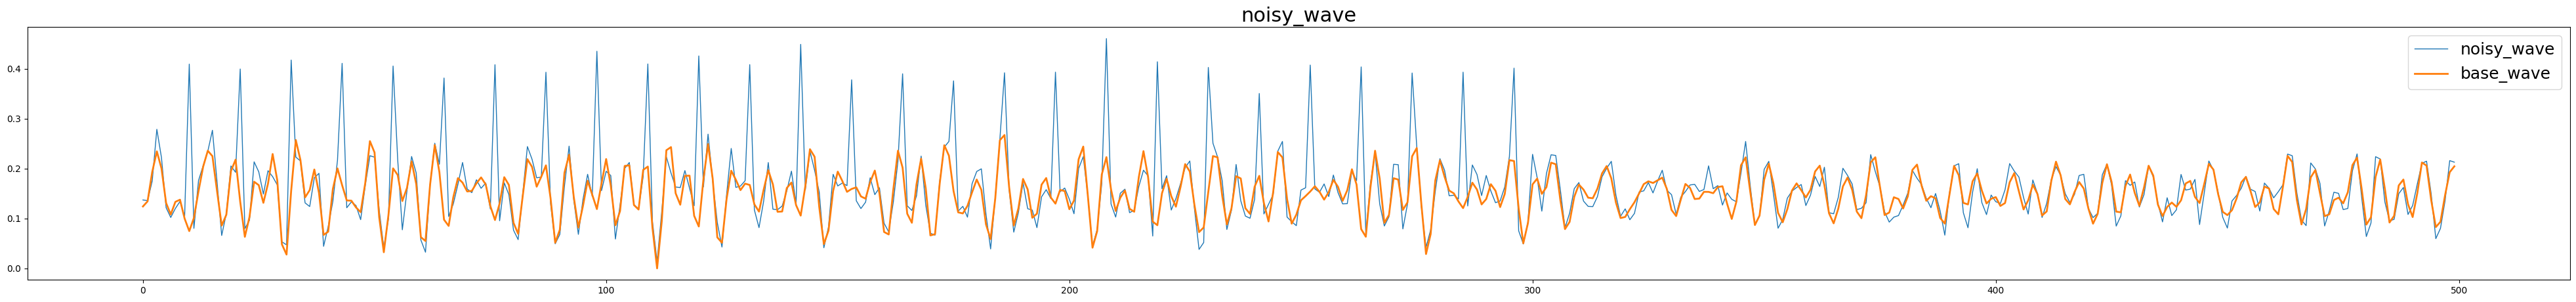

In [15]:
base_wave, _ = svr.generate_signal(t, n_sinusoids, amplitude_range, frequency_range)

inter_wave, _ = svr.generate_signal(t, n_sinusoids, (amplitude_range_2[0], amplitude_range_2[1]/2), frequency_range_2)

noise_power = random.choice(df_noise['Noise_Power'])
            
base_pattern = np.zeros(100)
base_pattern_2 = np.concatenate((np.zeros(10), np.array([1])), axis=0) 

variation_wave = svr.add_periodic_interrupts(base_wave.copy(), (0,0.4), inter_wave, 0, 300, length=500, base_pattern=base_pattern, base_pattern_2=base_pattern_2, flip_probability=0, flip_probability_2=0)

noisy_wave = svr.add_colored_noise(variation_wave, noise_power, npw=[1,1], mf=[1,1], color=color)

plt.figure(figsize=(50, 5))
plt.plot(range(len(noisy_wave)), noisy_wave, label='noisy_wave', linewidth=1)
plt.plot(range(len(base_wave)), base_wave, label='base_wave', linewidth=2)
plt.title(f"noisy_wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()